# EDA + LOGISTIC REGRESSION

<p> We are given two datasets: census.csv and census_test.csv. We'll have two determine applyin EDA if census_test is either a random sample from census.csv or if it's manipulated. Once we've guessed that, we'll apply a logistic regression and measure it with different statistics. </p>

# Exercise 1: EDA analysis

In [1]:
#First, we import the libraries we need

%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns

We are given two datasets: census and census_test. Applying EDA, we have to guess if census_test was randomly selected from census. If not, it may be biased. 

First of all, well import census dataset and give a quick view to the variables it contains

In [2]:
df_census = pd.read_csv("census.csv")
df_census_test = pd.read_csv("census_test.csv")
df_census.head(10)

,age,workclass,education,education_num,marital_status,occupation,relationship,race,gender,hours_per_week,native_country,greater_than_50k
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,0
5,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,0
6,49,Private,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,16,Jamaica,0
7,52,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,45,United-States,1
8,31,Private,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,50,United-States,1
9,42,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,40,United-States,1


We'll check dtypes that were automatically guessed by pandas library

In [3]:
df_census.dtypes

age                  int64
workclass           object
education           object
education_num        int64
marital_status      object
occupation          object
relationship        object
race                object
gender              object
hours_per_week       int64
native_country      object
greater_than_50k     int64
dtype: object

In [4]:
df_census.greater_than_50k.unique()

array([0, 1])

From the previous types, we see that:
    <ul>
    <li>age: discrete variable.</li> 
    <li>workclass: numeric variable.</li>
    <li>education: nominal variable.</li>
    <li>education_num: ordinal variable.</li>
    <li>marital_status: nominal variable</li>
    <li>occupation: nominal variable.</li>
    <li>relationship: nominal variable</li>
    <li>race: nominal variable.</li>
    <li>gender: nominal variable</li>
    <li>hours_per_week: discrete variable.</li>
    <li>native_country: nominal variable.</li>
    <li>greater_than_50k: binary data.</li>
    </ul>

First of all, we are going to clean all trailing and leading whitespaces

In [5]:
#For df_census
df_census_selected = df_census.select_dtypes(include = ["object"])
df_census[df_census_selected.columns] = df_census_selected.apply(lambda x: x.str.strip())

#For df_cesus_test

df_census_selected = df_census_test.select_dtypes(include = ["object"])
df_census_test[df_census_selected.columns] = df_census_selected.apply(lambda x: x.str.strip())

Since there's categorical data, we'll take advantage of the "category" dtype pd.Series

In [6]:
df_census = df_census.astype(
{
        "workclass" : "category", 
        "education" : "category",
        "marital_status" : "category",
        "occupation" : "category",
        "relationship" : "category",
        "race" : "category",
        "native_country" : "category"
}
)

df_census_test = df_census_test.astype(
{
        "workclass" : "category", 
        "education" : "category",
        "marital_status" : "category",
        "occupation" : "category",
        "relationship" : "category",
        "race" : "category",
        "native_country" : "category"
}
)

<p> In order to understand the dataset, we'll check out the categories in each variable </p>

In [7]:
for col_name in df_census.columns:
    if(isinstance(df_census[col_name].dtype, pd.core.dtypes.dtypes.CategoricalDtype)):
        print("Catergories for {} are:".format(col_name))
        for category in list(df_census[col_name].cat.categories):
            print("  -", category) 

Catergories for workclass are:
  - Federal-gov
  - Local-gov
  - Never-worked
  - Private
  - Self-emp-inc
  - Self-emp-not-inc
  - State-gov
  - Without-pay
Catergories for education are:
  - 10th
  - 11th
  - 12th
  - 1st-4th
  - 5th-6th
  - 7th-8th
  - 9th
  - Assoc-acdm
  - Assoc-voc
  - Bachelors
  - Doctorate
  - HS-grad
  - Masters
  - Preschool
  - Prof-school
  - Some-college
Catergories for marital_status are:
  - Divorced
  - Married-AF-spouse
  - Married-civ-spouse
  - Married-spouse-absent
  - Never-married
  - Separated
  - Widowed
Catergories for occupation are:
  - Adm-clerical
  - Armed-Forces
  - Craft-repair
  - Exec-managerial
  - Farming-fishing
  - Handlers-cleaners
  - Machine-op-inspct
  - Other-service
  - Priv-house-serv
  - Prof-specialty
  - Protective-serv
  - Sales
  - Tech-support
  - Transport-moving
Catergories for relationship are:
  - Husband
  - Not-in-family
  - Other-relative
  - Own-child
  - Unmarried
  - Wife
Catergories for race are:
  - Amer-I

Next, we are going to compare statistics for numerical data.

In [8]:
pd.concat([df_census[["age", "hours_per_week"]].describe(), df_census_test[["age", "hours_per_week"]].describe() ], axis = 1)

,age,hours_per_week,age,hours_per_week
count,32560.000000,32560.000000,16281.000000,16281.000000
mean,38.581849,40.437469,38.767459,40.392236
std,13.640593,12.347618,13.849187,12.479332
min,17.000000,1.000000,17.000000,1.000000
25%,28.000000,40.000000,28.000000,40.000000
50%,37.000000,40.000000,37.000000,40.000000
75%,48.000000,45.000000,48.000000,45.000000
max,90.000000,99.000000,90.000000,99.000000


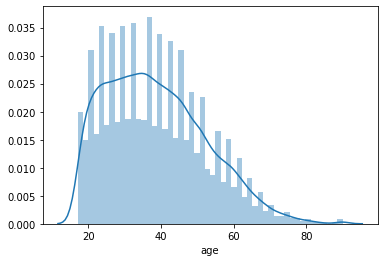

In [9]:
sns.distplot(df_census["age"])

In [10]:
import scipy.stats as stats
print("H0 hypothesis test:",stats.normaltest(df_census["age"]))

H0 hypothesis test: NormaltestResult(statistic=1525.8076419232084, pvalue=0.0)


The former distributionn is not normal

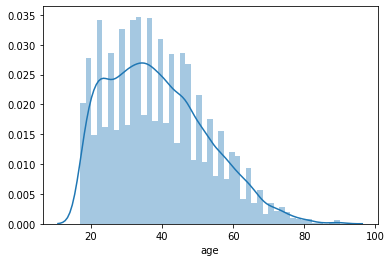

In [11]:
sns.distplot(df_census_test["age"])

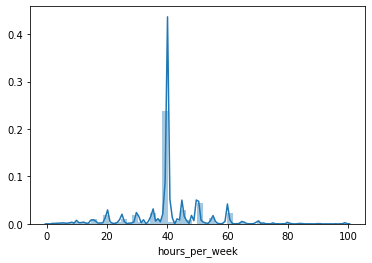

In [12]:
sns.distplot(df_census["hours_per_week"])

In [13]:
print("H0 hypothesis test:",stats.normaltest(df_census["hours_per_week"]))

H0 hypothesis test: NormaltestResult(statistic=2508.690253172476, pvalue=0.0)


The former distribution isn't normal too

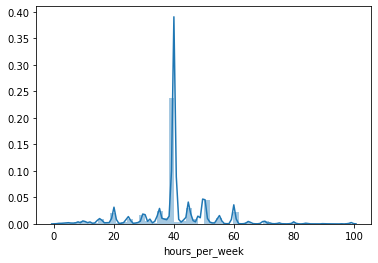

In [14]:
sns.distplot(df_census_test["hours_per_week"])

From the previous comparison, we see that there isn't such a big difference between census and census_test. From this perspective, the census_test may seem randomly selected. Let's see what happens with categorical data.

To do that, we are going to calculate proportions for each value


<b>For greater_than_50k </b>

In [15]:
print("Proportions of 1s for census: ", df_census.greater_than_50k.mean())
print("Proportions of 1s for census test: ", df_census_test.greater_than_50k.mean())

Proportions of 1s for census:  0.24081695331695332
Proportions of 1s for census test:  0.23622627602727106


<b>For workclass </b>

In [16]:
df_1 = pd.DataFrame({ "census": (df_census.workclass.value_counts()/df_census.workclass.count())})
df_2 = pd.DataFrame({ "census": (df_census_test.workclass.value_counts()/df_census_test.workclass.count())})
df_2 =df_2.rename(columns = {"census" : "census_test"})
pd.concat([df_1, df_2], axis = 1)

,census,census_test
Private,0.738673,0.731819
Self-emp-not-inc,0.082704,0.086238
Local-gov,0.068123,0.068090
State-gov,0.042247,0.044588
Self-emp-inc,0.036323,0.037799
Federal-gov,0.031246,0.030813
Without-pay,0.000456,0.000457
Never-worked,0.000228,0.000196


So far, so good, but we still have more work to do. We will group variables in order to
analise the proportion of paychecks greater than 50K

In [17]:
df_census_mean = pd.DataFrame({"avg_over_50k" : df_census[["workclass",  "greater_than_50k"]].groupby(["workclass"])["greater_than_50k"].mean()})
df_census_mean_test = pd.DataFrame({"avg_over_50k_test" : df_census_test[["workclass",  "greater_than_50k"]].groupby(["workclass"])["greater_than_50k"].mean()})
pd.concat([df_census_mean, df_census_mean_test], axis = 1)

,avg_over_50k,avg_over_50k_test
workclass,,
Federal-gov,0.386458,0.402542
Local-gov,0.294792,0.297220
Never-worked,0.000000,0.000000
Private,0.218683,0.216236
Self-emp-inc,0.557348,0.545769
Self-emp-not-inc,0.284927,0.267222
State-gov,0.271957,0.259151
Without-pay,0.000000,0.285714


We have 0 vs 28% of people in our test dataset that have a income greater than 50K without being paid!!! <b> How's that possible :S !</b>

Either it's manually modified or there's is an error in the dataset. Anyway, we should check the number of observations, because the fewer the number of observations, the greater the margin of error.

In [18]:
df_census_test[["workclass",  "greater_than_50k"]].groupby(["workclass"])["greater_than_50k"].value_counts()

workclass         greater_than_50k
Federal-gov       0                    282
                  1                    190
Local-gov         0                    733
                  1                    310
Never-worked      0                      3
Private           0                   8786
                  1                   2424
Self-emp-inc      1                    316
                  0                    263
Self-emp-not-inc  0                    968
                  1                    353
State-gov         0                    506
                  1                    177
Without-pay       0                      5
                  1                      2
Name: greater_than_50k, dtype: int64

We'll check other variables

<b>Education </b>

In [19]:
df_census_mean = pd.DataFrame({"avg_over_50k" : df_census[["education",  "greater_than_50k"]].groupby(["education"])["greater_than_50k"].mean()})
df_census_mean_test = pd.DataFrame({"avg_over_50k_test" : df_census_test[["education",  "greater_than_50k"]].groupby(["education"])["greater_than_50k"].mean()})
pd.concat([df_census_mean, df_census_mean_test], axis = 1)

,avg_over_50k,avg_over_50k_test
education,,
10th,0.066452,0.054825
11th,0.051064,0.050235
12th,0.076212,0.066964
1st-4th,0.035714,0.025316
5th-6th,0.048048,0.062500
7th-8th,0.061920,0.071197
9th,0.052529,0.057851
Assoc-acdm,0.248360,0.277154
Assoc-voc,0.261216,0.237113


<b>Marital status </b>

In [20]:
df_census_mean = pd.DataFrame({"avg_over_50k" : df_census[["marital_status",  "greater_than_50k"]].groupby(["marital_status"])["greater_than_50k"].mean()})
df_census_mean_test = pd.DataFrame({"avg_over_50k_test" : df_census_test[["marital_status",  "greater_than_50k"]].groupby(["marital_status"])["greater_than_50k"].mean()})
pd.concat([df_census_mean, df_census_mean_test], axis = 1)

,avg_over_50k,avg_over_50k_test
marital_status,,
Divorced,0.104209,0.094977
Married-AF-spouse,0.434783,0.285714
Married-civ-spouse,0.446848,0.444685
Married-spouse-absent,0.081340,0.114286
Never-married,0.045965,0.044534
Separated,0.064390,0.065347
Widowed,0.085599,0.081905


Also, it seems that there is a 12% of difference between Married-AF-spouse. But this is not so relevant.

In [21]:
df_census_test[["marital_status",  "greater_than_50k"]].groupby(["marital_status"])["greater_than_50k"].value_counts()

marital_status         greater_than_50k
Divorced               0                   1982
                       1                    208
Married-AF-spouse      0                     10
                       1                      4
Married-civ-spouse     0                   4111
                       1                   3292
Married-spouse-absent  0                    186
                       1                     24
Never-married          0                   5192
                       1                    242
Separated              0                    472
                       1                     33
Widowed                0                    482
                       1                     43
Name: greater_than_50k, dtype: int64

<b>Occupation </b>

In [22]:
df_census_mean = pd.DataFrame({"avg_over_50k" : df_census[["occupation",  "greater_than_50k"]].groupby(["occupation"])["greater_than_50k"].mean()})
df_census_mean_test = pd.DataFrame({"avg_over_50k_test" : df_census_test[["occupation",  "greater_than_50k"]].groupby(["occupation"])["greater_than_50k"].mean()})
pd.concat([df_census_mean, df_census_mean_test], axis = 1)

,avg_over_50k,avg_over_50k_test
occupation,,
Adm-clerical,0.134483,0.141771
Armed-Forces,0.111111,0.666667
Craft-repair,0.226641,0.225534
Exec-managerial,0.484014,0.465347
Farming-fishing,0.115694,0.116935
Handlers-cleaners,0.062774,0.074074
Machine-op-inspct,0.124938,0.119608
Other-service,0.041578,0.041155
Priv-house-serv,0.006711,0.021505


Even if there are 66% of Armed-Forces from test dataset have an income over 50K, it may be that the sample took more armed forces observations, since there are few of them.

In [23]:
df_census["occupation"].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2001
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

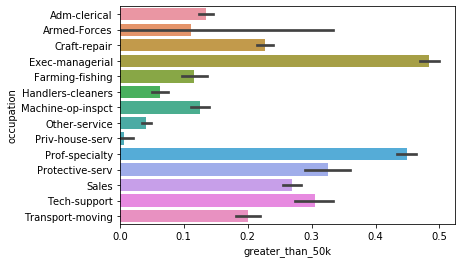

In [24]:
gr_occupation = sns.barplot(y = "occupation", x ="greater_than_50k", data=df_census, estimator = np.mean)

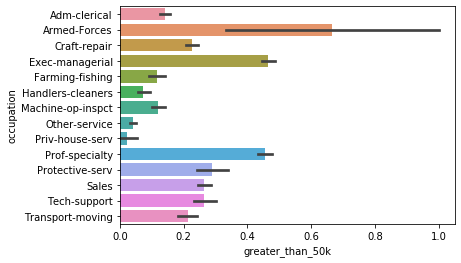

In [25]:
gr_occupation = sns.barplot(y = "occupation", x ="greater_than_50k", data=df_census_test, estimator = np.mean)

From the former graphics, we see that the margin of error in Armed-Forces is high, because there are very few observations. Because of that we can't state that census.csv is manipulated.

<b>Relationship </b>

In [26]:
df_census_mean = pd.DataFrame({"avg_over_50k" : df_census[["relationship",  "greater_than_50k"]].groupby(["relationship"])["greater_than_50k"].mean()})
df_census_mean_test = pd.DataFrame({"avg_over_50k_test" : df_census_test[["relationship",  "greater_than_50k"]].groupby(["relationship"])["greater_than_50k"].mean()})
pd.concat([df_census_mean, df_census_mean_test], axis = 1)

,avg_over_50k,avg_over_50k_test
relationship,,
Husband,0.448571,0.448873
Not-in-family,0.103070,0.098177
Other-relative,0.037755,0.028571
Own-child,0.013220,0.017509
Unmarried,0.063262,0.054199
Wife,0.475128,0.456094


<b>Race </b>

In [27]:
df_census_mean = pd.DataFrame({"avg_over_50k" : df_census[["race",  "greater_than_50k"]].groupby(["race"])["greater_than_50k"].mean()})
df_census_mean_test = pd.DataFrame({"avg_over_50k_test" : df_census_test[["race",  "greater_than_50k"]].groupby(["race"])["greater_than_50k"].mean()})
pd.concat([df_census_mean, df_census_mean_test], axis = 1)

,avg_over_50k,avg_over_50k_test
race,,
Amer-Indian-Eskimo,0.115756,0.119497
Asian-Pac-Islander,0.265640,0.277083
Black,0.123880,0.114670
Other,0.092251,0.185185
White,0.255869,0.250251


<b>Gender </b>

In [28]:
df_census_mean = pd.DataFrame({"avg_over_50k" : df_census[["gender",  "greater_than_50k"]].groupby(["gender"])["greater_than_50k"].mean()})
df_census_mean_test = pd.DataFrame({"avg_over_50k_test" : df_census_test[["gender",  "greater_than_50k"]].groupby(["gender"])["greater_than_50k"].mean()})
pd.concat([df_census_mean, df_census_mean_test], axis = 1)

,avg_over_50k,avg_over_50k_test
gender,,
Female,0.109471,0.108836
Male,0.305737,0.299816


<b>Native country </b>

In [29]:
df_census_mean = pd.DataFrame({"avg_over_50k" : df_census[["native_country",  "greater_than_50k"]].groupby(["native_country"])["greater_than_50k"].mean()})
df_census_mean_test = pd.DataFrame({"avg_over_50k_test" : df_census_test[["native_country",  "greater_than_50k"]].groupby(["native_country"])["greater_than_50k"].mean()})
pd.concat([df_census_mean, df_census_mean_test], axis = 1)

,avg_over_50k,avg_over_50k_test
native_country,,
Cambodia,0.368421,0.222222
Canada,0.322314,0.393443
China,0.266667,0.340426
Columbia,0.033898,0.076923
Cuba,0.263158,0.209302
Dominican-Republic,0.028571,0.090909
Ecuador,0.142857,0.117647
El-Salvador,0.084906,0.040816
England,0.333333,0.459459


One last plot to show the proportions

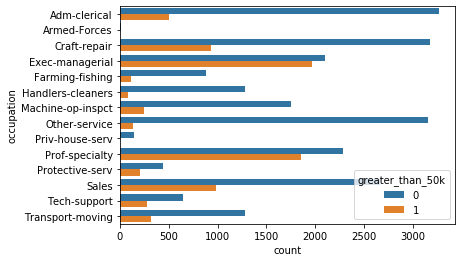

In [30]:
sns.countplot(y='occupation', hue='greater_than_50k', data=df_census)

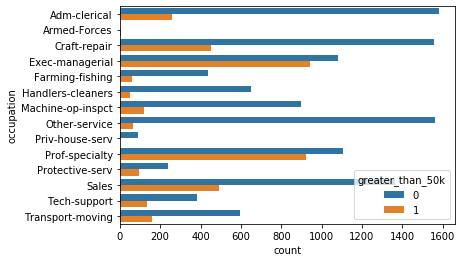

In [31]:
sns.countplot(y='occupation', hue='greater_than_50k', data=df_census_test)

<b> We can state that census_test.csv is not manipulated. Data distribution is very similar for both datasets and when there is a significant difference, the margin of error is high because there are very few observations (as in Armed-foces). Also, it seems that there is an error because there are people workclass Without-pay that have an income over 50K, while in the original dataset (census.csv), there were 0 people. 

# Exercise 2: applying logistic regresion

In [32]:
%matplotlib inline
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

First of all, we have to deal with null values. A good aproach to deal with null values
is applyin a heatmap

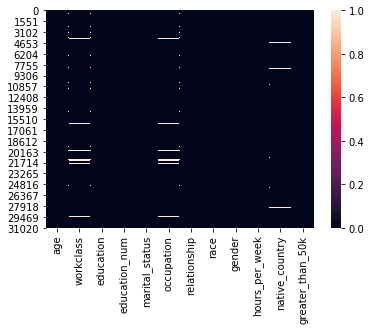

In [33]:
sns.heatmap(df_census.isnull())

In [34]:
df_census.dropna(inplace = True)

<b> We are going to calculate a logistic regression using sklearn </b>

In [35]:
from sklearn.model_selection import train_test_split
from warnings import simplefilter

simplefilter(action='ignore', category=FutureWarning)


Because we can't compute independent categorical variables in a machine learning algorithm, we have to use the pandas method get_dummies.

In [36]:
df_census_dummies = pd.get_dummies(df_census[['workclass', 'education', 'marital_status',
       'occupation', 'relationship', 'race', 'gender',
       'native_country']])

In [37]:
df_census.drop(['workclass', 'education', 'marital_status',
       'occupation', 'relationship', 'race', 'gender',
       'native_country'], axis = 1, inplace=True)

In [38]:
#We get together original dataset with dummies

df_census_train = pd.concat([df_census_dummies, df_census], axis = 1)

We'll split census dataset for training and test

In [39]:
X_train, X_test, y_train, y_test = train_test_split(df_census_train.drop('greater_than_50k',axis=1), 
                                                    df_census_train['greater_than_50k'], test_size=0.30, 
                                                    random_state=101)

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
predictions = logmodel.predict(X_test)

In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      6739
           1       0.71      0.57      0.64      2310

    accuracy                           0.83      9049
   macro avg       0.79      0.75      0.76      9049
weighted avg       0.82      0.83      0.83      9049



In [43]:
# Our accuracy is:
logmodel_score = logmodel.score(X_test, y_test)
print("Model Score: " ,logmodel_score)

Model Score:  0.832357166537739


In [44]:
pd.DataFrame(metrics.confusion_matrix(y_test, predictions), columns = ["PREDICTED_FALSE","PREDICTED_TRUE" ], index = ["ACTUAL_FALSE", "ACTUAL_TRUE"])

,PREDICTED_FALSE,PREDICTED_TRUE
ACTUAL_FALSE,6212,527
ACTUAL_TRUE,990,1320


<b> Now let's calculate KS and GINI index </b>

KS and GINI for train

In [45]:
a = logmodel.predict_proba(X_train)[:,1]
b = y_train

tot_bads=1.0*sum(b)
tot_goods=1.0*(len(b)-tot_bads)
elements_df = pd.DataFrame({'probability': a,'gbi': b})
pivot_elements_df = pd.pivot_table(elements_df, values='gbi', index=['probability'], aggfunc=[sum,len]).fillna(0)
max_ks = perc_goods = perc_bads = cum_perc_bads = cum_perc_goods = 0
cum_perc_bads_list = [0.0]
cum_perc_goods_list = [0.0]
cum_cp_minus = [0.0]
cum_cp_plus = [0.0]

for i in range(len(pivot_elements_df)):
    perc_goods =  ((pivot_elements_df['len'].iloc[i]['gbi'] - pivot_elements_df['sum'].iloc[i]['gbi']) / tot_goods)
    perc_bads = float(pivot_elements_df['sum']['gbi'].iloc[i]/ tot_bads)
    cum_perc_goods += perc_goods   
    cum_perc_bads += perc_bads

    
    cum_perc_bads_list.append(cum_perc_bads)
    cum_perc_goods_list.append(cum_perc_goods)
    cum_diff = cum_perc_bads-cum_perc_goods

    cum_cp_minus.append(0.0)    
    cum_cp_minus[-1] = cum_perc_bads_list[-1] - cum_perc_bads_list[-2]

    cum_cp_plus.append(0.0)
    cum_cp_plus[-1] = cum_perc_goods_list[-1] + cum_perc_goods_list[-2]
    
    
    if abs(cum_diff) > max_ks:
        max_ks = abs(cum_diff)

print('KS=',max_ks)

KS= 0.6199763948613243


In [46]:
z_score = 0
for i in range(len(cum_cp_plus)):
    try:
        z_score +=  cum_cp_minus[i] * cum_cp_plus[i]
    except:
        pass
print('GINI=',1- z_score/100.0)

GINI= 0.9822575910979414


KS and GINI for test

In [47]:
a = logmodel.predict_proba(X_test)[:,1]
b = y_test

tot_bads=1.0*sum(b)
tot_goods=1.0*(len(b)-tot_bads)
elements_df = pd.DataFrame({'probability': a,'gbi': b})
pivot_elements_df = pd.pivot_table(elements_df, values='gbi', index=['probability'], aggfunc=[sum,len]).fillna(0)
max_ks = perc_goods = perc_bads = cum_perc_bads = cum_perc_goods = 0
cum_perc_bads_list = [0.0]
cum_perc_goods_list = [0.0]
cum_cp_minus = [0.0]
cum_cp_plus = [0.0]

for i in range(len(pivot_elements_df)):
    perc_goods =  ((pivot_elements_df['len'].iloc[i]['gbi'] - pivot_elements_df['sum'].iloc[i]['gbi']) / tot_goods)
    perc_bads = float(pivot_elements_df['sum']['gbi'].iloc[i]/ tot_bads)
    cum_perc_goods += perc_goods   
    cum_perc_bads += perc_bads

    
    cum_perc_bads_list.append(cum_perc_bads)
    cum_perc_goods_list.append(cum_perc_goods)
    cum_diff = cum_perc_bads-cum_perc_goods

    cum_cp_minus.append(0.0)    
    cum_cp_minus[-1] = cum_perc_bads_list[-1] - cum_perc_bads_list[-2]

    cum_cp_plus.append(0.0)
    cum_cp_plus[-1] = cum_perc_goods_list[-1] + cum_perc_goods_list[-2]
    
    
    if abs(cum_diff) > max_ks:
        max_ks = abs(cum_diff)

print('KS=',max_ks)

KS= 0.6129094133843203


In [48]:
z_score = 0
for i in range(len(cum_cp_plus)):
    try:
        z_score +=  cum_cp_minus[i] * cum_cp_plus[i]
    except:
        pass
print('GINI=',1- z_score/100.0)

GINI= 0.9822930078775138
